In [1]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
images = [cv2.imread(os.path.join(image)) for image in glob('*.png')]
hsv_images = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in images]

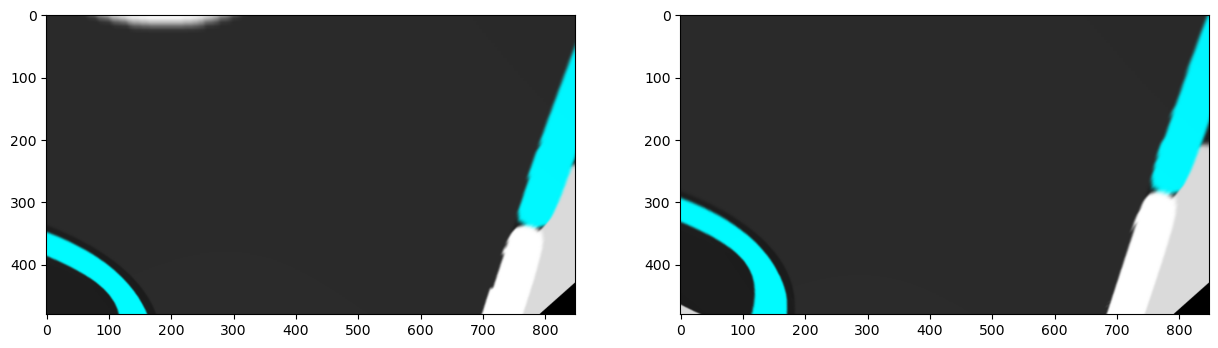

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (15, 20))

for image, ax in zip(images, axs):
    ax.imshow(image)

plt.show()

In [17]:
yellow_coords = np.transpose(yellow_mask.nonzero())
white_coords = np.transpose(white_mask.nonzero())

In [99]:
image.shape

(480, 848, 3)

113
[] []
129
[] []


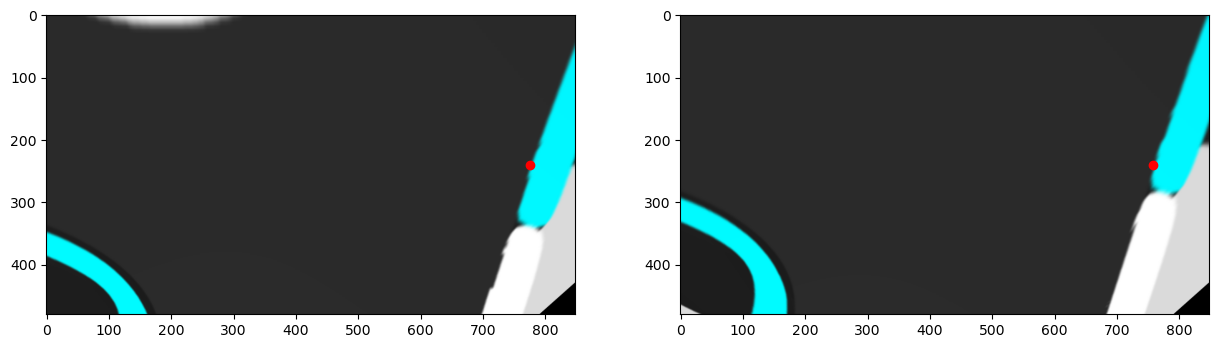

In [66]:
fig, axs = plt.subplots(1, 2, figsize = (15, 20))

for hsv_image, image, ax in zip(hsv_images, images, axs):

    yellow_mask = cv2.inRange(hsv_image, (20, 100, 100), (30, 255, 255))
    white_mask = cv2.inRange(hsv_image, (0, 0, 255), (255, 0, 255))

    # Маска для линий
    yellow_mask = cv2.inRange(image, (20, 100, 100), (30, 255, 255))
    white_mask = cv2.inRange(image, (0, 0, 255), (255, 0, 255))

    y_contours, _ = cv2.findContours(yellow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    w_contours, _ = cv2.findContours(white_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    xs_white = []
    xs_yellow = []
    print(len(y_contours))
    for y_contour, w_contour in zip(y_contours, w_contours):  

        y_moment = cv2.moments(y_contour, binaryImage = True)
        w_moment = cv2.moments(w_contour, binaryImage = True)

        xs_yellow.append(y_moment['m10'] // y_moment['m00'])
        xs_white.append(w_moment['m10'] // w_moment['m00'])

    print(xs_white, xs_yellow)

    # Определение центров линий
    M_yellow = cv2.moments(yellow_mask, binaryImage = True)
    M_white = cv2.moments(white_mask, binaryImage = True)

    yellow_center_x = 0 if M_yellow['m00'] == 0 else M_yellow['m10'] // M_yellow['m00']
    white_center_x = image.shape[1] if M_white['m00'] == 0 else M_white['m10'] // M_white['m00']

    ax.scatter([(yellow_center_x + white_center_x) / 2], image.shape[0] / 2, color = 'red')
    ax.imshow(image)

plt.show()   